# Chap08 - 차원 축소 (Dimensionality Reduction)

대부분 실무에서 분석하는 데이터는 매우 많은 특성(feature)들을 가지고 있다. 이러한 데이터를 가지고 머신러닝 알고리즘을 적용해 문제를 해결하려고 한다면, 데이터의 차원이 크기 때문에  학습 속도가 느릴 뿐만아니라 성능 또한 좋지않을 가능성이 크다. 

이번 장에서는 데이터의 차원을 축소하는 방법인 투영(projection)과 매니폴드 학습(manifold learning)에 대해 알아보도록 하자.

## SetUp

In [2]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

## 8.1 차원의 저주 

머신러닝에서 데이터 셋의 특성(feature)가 많아지면, 각 특성인 하나의 차원(dimension) 또한 증가하게 된다. 이렇게 데이터의 차원이 증가할 수록 데이터 공간의 부피가 기하 급수적으로 증가하기 때문에, 데이터의 밀도는 차원이 증가할 수록 희소(sparse)해진다. 아래의 그림은 데이터의 차원이 증가할수록 각 영역(region)에 포함되는 데이터의 개수를 나타낸  그림(출처: [jermwatt's blog](https://jermwatt.github.io))이다. 그림에서 알 수 있듯이 차원이 증가할 수록 데이터의 밀도가 희소해지는것을 알 수 있다.

![](./images/curse.png)

데이터의 차원이 증가할수록 데이터 포인트 간의 거리 또한 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습 하게되면 모델이 복잡해지게 된다. 따라서, 오버피팅(overfitting) 위험이 커진다. 

이러한 차원의 저주를 해결하기 위한 방법 중 하나는 데이터의 밀도가 높아질 때까지 학습 데이터셋의 크기를 늘리는 것이다. 하지만, 데이터셋의 크기에 비해 차원은 기하급수적으로 커지기 때문에 매우 힘든일이라 할 수 있다.

## 8.2 차원 축소를 위한 접근 방법

차원의 저주를 해결하는 방법인 차원을 축소하는 두 가지 접근법인 투영(projection)과 매니폴드 학습(manifold learning)에 대해 알아보도록 하자.

### 8.2.1 투영 (Projection)

일반적으로 대부분의 실제 데이터셋에서는 모든 데이터의 특성, 즉 차원이 고르게 분포되어 있지 않다. 필기체 숫자 데이터셋인 MNIST를 예로들면, 어떤 특성(각 pixel을 하나의 특성으로 볼 때)은 거의 변화가 없고, 또 어떤 특성은 다른 특성들과 서로 연관되어 있다. 

이렇듯 학습 데이터셋은 고차원 공간에서 저차원 **부분 공간(subspace)**에 위치하게 된다. 즉, 고차원의 데이터의 특성 중 일부 특성으로 데이터를 표현할 수 있다는 말이 된다.

아래의 그림은 왼쪽 3차원 공간상의 데이터를 2차원 부분 공간으로 투영(porjection)시켜 2차원 데이터셋으로 만든 것이다.

![](./images/projection.png)

### 8.2.2 매니폴드 학습 (Manifold Learning)

**매니폴드(manifold)**의 정의는 다음과 같다.

> 매니폴드는 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간이다. 즉, 국소적으로는 유클리드 공간과 구별할 수 없으나 , 대역적으로 독특한 위상수학적 구조를 가질 수 있다(출처: *위키피디아* ). 예를들어, 아래의 원 그림은 모든 점에 대해서 국소적으로 직선과 같은 구조를 가지는 1차원 매니폴드라 할 수 있다.

> ![](./images/manifold01.png)

아래 그림은 스위스 롤(swiss roll, 롤케잌 모양의 데이터셋) 데이터셋이며 2D-매니폴드의 한 예이다. 그림에서 볼 수 있듯이 2D-매니폴드는 고차원(3차원) 공간에서 휘거나 말린 2D 모양이다. 일반적으로 $d$-차원 매니폴드는 국소적으로 $d$-차원 초평면으로 볼 수 있는 $n$-차원 공간의 일부이다($d < n$). 스위스 롤은 $d=2$이고 $n=3$인, 국소적으로는 2D 평면이지만 3차원으로 말려있는 데이터이다.

![](./images/manifold02.png)

대부분의 차원 축소 알고리즘이 이러한 **매니폴드**를 모델링하는 방식으로 동작하며, 이를 **매니폴드 학습(Manifold Learning)** 이라고 한다. 매니폴드 학습은 **매니폴드 가정**(manifold assumption) 또는 **매니폴드 가설**(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정한다.

매니폴드 가정은 종종 다른 가정과 함께 쓰이기도 한다. 예를들어, 분류나 회귀같은 작업을 하기전에 학습 데이터셋을 저차원의 매니폴드 공간으로 표현하면 더 간단하게 문제를 해결할 수 있다라는 가정을 할 수 있다. 

![](./images/manifold03.png)

하지만, 이러한 가정이 항상 통하지는 않는다. 아래의 그림에서 볼 수 있듯이 저차원 매니폴드가 오히려 결정 경계(decision boundary)를 찾는 것이 더 어려운 것을 알 수 이다. 

![](./images/manifold04.png)

따라서, 모델을 학습시키기 전에 학습 데이터셋의 차원을 감소시키면 학습 속도는 빨라지지만 모델의 성능은 항상 더 낫거나 간단한 모델이 되는 것은 아니다. 이것은 데이터셋이 어떠한 모양을 하고 있느냐에 따라 달라진다.

## 8.3 PCA

**주성분 분석(PCA**, Principal Component Analysis**)**은 가장 대표적인 차원 축소 알고리즘이다. PCA는 먼저 데이터에 가장 가까운 초평면(hyperplane)을 구한 다음, 데이터를 이 초평면에 투영(projection)시킨다.

### 8.3.1 분산 보존

저차원의 초평면에 데이터를 투영하기 전에 먼저 적절한 초평면을 선택해야 한다. PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 **평균제곱거리**를 **최소화** 하는 축을 찾는다. 아래의 그림에서 왼쪽 2차원 데이터셋을 오른쪽 그림처럼 투영했을 때 $C_1$축으로 투영한 데이터가 분산이 최대로 보존되는 것을 확인할 수 있다.

![](./images/pca01.png)

### 8.3.2 주성분

PCA는 다음과 같은 단계로 이루어진다. 

1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 
2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
4. `1~3`과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.

![](./images/pca02.gif)

이렇게 $i$-번째 축을 정의하는 **단위 벡터**(unit vector)를 $i$-번째 **주성분**(PC, Principal Component)이라고 한다.

예를들어, 위의 그림에서는 2차원 데이터셋이므로 PCA는 분산을 최대로 보존하는 단위벡터 $c_1$이 구성하는 축과 이 축에 직교하는 $c_2$가 구성하는 축을 찾게 된다. 

### 8.3.3 PCA 구하는 과정

그렇다면, 이러한 축을 구하는 과정을 단계별로 살펴 보도록하자.

#### 1) 공분산 (Covariance)

먼저, 주성분(PC)를 구하기 위해서는 공분산에 대해 알아야 한다. **공분산(covariance)**은 2개의 특성(또는 변수)간의 상관정도를 나타낸 값이다. 

예를들어, 아래의 그림과 같이 $\mathbf{X}, \mathbf{Y}$ 두 개의 특성에 대해 공분산을 구하면 다음과 같다.

<img src="./images/pca02.png" height="45%" width="45%"/>

- $\mathbf{X}, \mathbf{Y}$에 대한 각 기대값

$$
E[\mathbf{X}] = \mu, \quad E[\mathbf{Y}] = v
$$

- 공분산 $cov(\mathbf{X}, \mathbf{Y})$는 다음과 같이 나타낼 수 있다.

$$
\begin{align*}
cov(\mathbf{X}, \mathbf{Y}) &= E[\left( \mathbf{X} - \mu \right)\left( \mathbf{Y} - v \right)] \\ &= E[\mathbf{XY} - v \mathbf{X} - \mu \mathbf{Y} + uv] \\ &= E[\mathbf{XY}] - vE[\mathbf{X}] - \mu E[\mathbf{Y}] + uv \\ &= E[\mathbf{XY}] - vu -uv + uv \\ &= E[\mathbf{XY}] - uv
\end{align*}
$$

- 위의 공분산 식을 벡터로 나타내면 다음과 같다.

$$
\begin{align*}
E[\mathbf{XY}] - uv &= \frac{1}{m-1} \sum_{i=1}^{m}{X_i Y_i} - uv \\ &= \frac{1}{m-1} \left< \mathbf{X}, \mathbf{Y} \right> - uv \\ &= \frac{1}{m-1} \mathbf{X}^{T} \mathbf{Y} - uv
\end{align*}
$$

- 다음은 $n$개의 특성(feature)과 $m$개의 관측치로 구성된 데이터에 대한 공분산 $cov(\mathbf{X})$을 구해보자. 오른쪽의 데이터 행렬에서 각 열벡터의 평균은 $E[X_i - \mu_i]=E[X_i] - \mu_i = \mu_i - \mu_i = 0$이다. $X_i - \mu_i$를 편차라 한다.

![](./images/pca03.png)

$$
cov(\mathbf{X}) = \frac{1}{m-1} \mathbf{X}^{T} \mathbf{X}
$$

#### 2) PCA 계산

PCA의 목적은 원 데이터(original data)의 분산을 최대한 보존하는 축을 찾아 투영(projection)하는 것이다. 예를들어, 평균 0으로 조정한(편차를 구한) 데이터셋 $\mathbf{X}$를 단위벡터 $\vec{e}$인 임의의 축 $P$에 투영한다고 했을 때, $\mathbf{X}$의 투영된 결과는 $\mathbf{X}\vec{e}$로 표현할 수 있다. 이때의 분산은 다음과 같이 나타낼 수 있다.

$$
\begin{align*}
Var\left[ \mathbf{X} \vec{e} \right] &= \frac{1}{m-1} \sum_{i=1}^{m}{\left[ X \vec{e} - E\left( X \vec{e} \right) \right]^{2}} \\ &= \frac{1}{m-1} \sum_{i=1}^{m}{\left[ X \vec{e} - E(X)\vec{e} \right]^{2}}, \quad (E(X) = 0) \\ &= \frac{1}{m-1} \sum_{i=1}^{m}{\left( X \vec{e} \right)^{2}} \\ &= \frac{1}{m-1} \left( \mathbf{X}\vec{e} \right)^{T} \left( \mathbf{X}\vec{e} \right) \\ &= \frac{1}{m-1} \vec{e}^{T} \mathbf{X}^{T} \mathbf{X} \vec{e} \\ &= \vec{e}^{T} \left( \frac{\mathbf{X}^{T} \mathbf{X}}{m-1} \right) \vec{e}, \quad \left( \frac{\mathbf{X}^{T} \mathbf{X}}{m-1} = \mathbf{C} \right) \\ &= \vec{e}^{T} \mathbf{C} \vec{e}
\end{align*}
$$

따라서, PCA는 $Var\left[ \mathbf{X} \vec{e} \right] = \vec{e}^{T} \mathbf{C} \vec{e}$를 목적함수로 하는 최대화 문제이며 이때 제약조건은 $\left\| \vec{e} \right\|^{2} = 1$ 이다.

$$
\text{maximize} \quad \vec{e}^{T} \mathbf{C} \vec{e}
$$
$$
\text{s.t.} \quad \left\| \vec{e} \right\|^{2} = 1
$$

위의 식을 ['서포트벡터머신, SVM'](http://excelsior-cjh.tistory.com/165)에서 살펴본 라그랑제 승수법을 이용하여 계산할 수 있다. 위의 식을 라그랑지안 함수 $L$로 나타내면 다음과 같다.

$$
L\left( \vec{e}, \lambda \right) = \vec{e}^{T} \mathbf{C} \vec{e} - \lambda \left( \vec{e}^{T} \vec{e} -1 \right)
$$

라그랑지안 함수 $L$을 $\vec{e}$에 대해 편미분 하면 다음과 같다.

$$
\begin{align*}
\frac{\partial L}{\partial \vec{e}} &=  \left( \mathbf{C} + \mathbf{C}^{T} \right)\vec{e} - 2 \lambda \vec{e}  \\ &= 2 \mathbf{C} \vec{e} - 2 \lambda \vec{e} = 0
\end{align*}
$$

$$
\therefore  \mathbf{C} \vec{e} = \lambda \vec{e}
$$

$$
\therefore  \mathbf{C} = \vec{e} \lambda \vec{e}^{T}
$$

즉, $ \mathbf{C} \vec{e} = \lambda \vec{e} $를 만족하는 $\vec{e}$가 바로 분산 $Var\left[ \mathbf{X} \vec{e} \right]$를 최대화한다. 

위의 식에서 $\vec{e}$는 공분산 $\mathbf{C}$의 **고유벡터**(eigenvector)이며, $\lambda$는 $\mathbf{C}$의 **고유값**(eigenvalue)이자 eigenvector로 투영했을 때의 **분산**(variance)이다. 이때, 고유벡터의 열벡터를 **주성분**(PC, principal component)이라고 한다. 따라서, 고유벡터(eigenvector)에 투영하는 것이 분산이 최대가 된다.

### 8.3.4 Scikit-Learn에서의 PCA 계산

Scikit-Learn에서는 PCA를 계산할 때, 데이터셋에 대한 공분산의 **고유값 분해(eigenvalue-decomposition)**이 아닌 **특이값 분해(SVD, Singular Value Decomposition)**를 이용해 계산한다. SVD에 대한 자세한 내용은 ['다크프로그래머'님의 블로그](http://darkpgmr.tistory.com/106)에서 확인할 수 있다. 데이터셋 $\mathbf{X}$에 대한 SVD는 다음과 같이 나타낼 수 있다.  

$$
\mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^{T}
$$

- $\mathbf{U}$ : $m \times m$ 직교행렬 → $\mathbf{X} \mathbf{X}^{T}$의 eigenvector, $\mathbf{X}$의 **left singular vector**
- $\mathbf{V}$ : $n \times n$ 직교행렬 → $\mathbf{X}^{T} \mathbf{X}$의 eigenvector, $\mathbf{X}$의 **right singular vector**라 하며, PCA의 주성분행렬
- $\Sigma$ : $m \times n$ 대각행렬 → $\mathbf{X} \mathbf{X}^{T}$ 또는 $\mathbf{X}^{T} \mathbf{X}$의 **eigenvalue의 제곱근**을 대각원소로 하는 행렬

그렇다면, 왜 Scikit-Learn은 [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)계산에서 SVD를 사용하는 것일까? 

그 이유는 정확히는 모르겠지만 [stackoverflow](https://stackoverflow.com/questions/42291068/why-in-doing-pca-scikit-learn-use-svd-to-get-eigenvalue-while-the-traditional-m?rq=1)에서 확인할 수 있듯이, eigenvalue-decomposition에서는 공분산 행렬을 메모리상에 가지고 있어야하는 반면 SVD는 공분산 행렬을 따로 메모리에 저장할 필요가 없으므로 효율적이기 때문이다.

### 8.3.5 예제 데이터를 이용한 PCA 구하기

위에서 살펴본 PCA 구하는 방법을 가지고, 예제 데이터셋에 적용해보자. 

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [7]:
import pandas as pd

df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


#### 1) eigen-decomposition을 이용한 PCA 구하기

eigen-decomposition을 이용해 PCA를 구하기 위해서는 먼저 공분산 행렬을 구해야 한다. 

In [9]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

# np.cov()를 이용해 구할 수도 있다.
# print(np.cov(X_cen.T))

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


위에서 구한 공분산 행렬 `X_cov`에 대해 [`np.linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)를 이용해 eigenvalue(`w`)와 eigenvector(`v`)를 구할 수 있다.

In [38]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector :
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [64]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


#### 2) SVD를 이용한 PCA 구하기

SVD는 공분산 행렬 `X_cov`을 사용하지 않고, `X_cen`의 singular value와 singular vector를 계산한다. 마찬가지로 [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)를 이용하여 SVD를 구할 수 있다.

In [50]:
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [63]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


### 3) Scikit-Learn을 이용한 PCA 구하기

Scikit-Learn의 [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)를 이용해 간단하게 구할 수 있다. Scikit-Learn은 편차 또한 자동으로 처리해 계산해준다. 아래의 코드에서 `singular vector` 즉 주성분 행렬을 보면 위의 결과와 부호(`-`)가 다른것을 확인할 수 있다. 이는 벡터의 방향만 반대일 뿐 주성분 벡터가 구성하는 축은 동일하다.

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


Scikit-Learn 0.18버전에서 부터 공분산 행렬의 eigenvalue 또한 확인할 수 있도록 추가되었다.

In [62]:
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


### 8.3.6 Explained Variance Ratio 와 적절한 차원 수 선택하기

**Explained Variance Ratio**은 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율을 말하며, 각 eigenvalue의 비율과 같은 의미이다.

아래의 코드는 위의 8.3.5에서 구한 주성분 벡터를 이용해 투영한 뒤 분산의 비율 즉, Explained Variance Ratio를 계산한 코드이다.

In [82]:
# PC1에 projection
pc1 = v[:, 0]
proj1 = np.dot(X, pc1)

# PC2에 projection
pc2 = v[:, 1]
proj2 = np.dot(X, pc2)

# PC3에 projection
pc3 = v[:, 2]
proj3 = np.dot(X, pc3)

proj_list = np.array([proj1.var(), proj2.var(), proj3.var()])

print('variance(==eigenvalue) :', proj_list)
print('explained variance ratio :', proj_list / proj_list.sum())

variance(==eigenvalue) : [0.76533792 0.13291972 0.01017034]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


Scikit-Learn의 `PCA`에서는 `explained_variance_ratio_`를 통해 위의 코드를 단 한줄로 구할 수 있다.

In [83]:
print('explained variance ratio :', pca.explained_variance_ratio_)

explained variance ratio : [0.84248607 0.14631839 0.01119554]


위의 결과의 의미는 원 데이터셋 분산의 `84.2%`가 첫 번째 주성분 축에 놓여 있고, `14.6%`가 두 번째 주성분 축에 놓여 있다는 것을 말한다. 그리고 세 번째 주성분 축에는 `1.1%` 정도로 매우 적은 양의 정보가 들어 있다는 것을 알 수 있다. 

따라서, 첫 번째 주성분과 두 번째 주성분을 이용해 3차원의 데이터셋 `X`를 2차원으로 투영할 경우, 원래 데이터셋의 분산에서 `1.1%`를 잃게 된다.

#### 적절한 차원 수 선택하기

'Explained Variance Ratio'를 이용해 축소할 차원의 수를 선택할 수 있다. 예를들어, 누적된 분산의 비율이 `95%`가 되는 주성분 축, 차원을 선택하는 것과 같은 방법이다.

In [93]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 2


Scikit-Learn의 `PCA`에서는 `n_components`에 `0 ~ 1`사이의 값을 지정해 PCA 계산을 할 수 있다. 

In [96]:
pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


### 8.3.8 압축을 위한 PCA

데이터셋의 차원을 축소하게 되면 데이터셋의 크기가 줄어든다. 다음의 예제는 MNIST 데이터셋에 분산의 `95%`만 유지하도록 PCA를 적용한 것이다. 

![](./images/mnist.png)

In [113]:
from tensorflow.keras.datasets import mnist

# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# reshape
train_x = train_x.reshape(-1, 28*28) 

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)  # PCA 계산 후 투영

In [118]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 154


PCA 적용결과 총 784 차원에서 154로 80%정도 차원이 축소된 것을 알 수 있다. 이러한 압축한 데이터셋을 이용해 SVM과 같은 분류알고리즘을 학습 시킬 경우 학습 속도를 빠르게 할 수 있다.

또한, 압축된 데이터셋에 PCA 투영 변환을 반대로 적용하여 다시 원 데이터의 차원(mnist 경우 784)로 복원할 수 있다. 위에서 `5%` 만큼의 정보(분산)을 잃었기 때문에 완벽하게 복원은 할 수 없지만, 원본 데이터와 비슷하게 복원할 수 있다. 이러한 원본 데이터와 복원한 데이터간의 평균 제곱 거리를 **재구성 오차**(reconstruction error)라고 한다. 압축 후 복원하는 과정을 식으로 나타내면 다음과 같다.

$$
\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d \text{-proj}} \mathbf{V}_{d}^{T}
$$

- $\mathbf{X}_{d \text{-proj}} = \mathbf{X} \mathbf{V}_{d}$
- $\mathbf{V}_{d}$ = orthogonal matrix → $\mathbf{V}_{d}\mathbf{V}_{d}^{T} = \mathbf{I}$

아래의 예제는 위의 예제에서 압축한 `X_reduced`에다가 `PCA`의 `inverse_transform()`메소드를 이용해 784차원으로 복원한 코드이다. 

In [129]:
X_recovered = pca.inverse_transform(X_reduced)

In [130]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

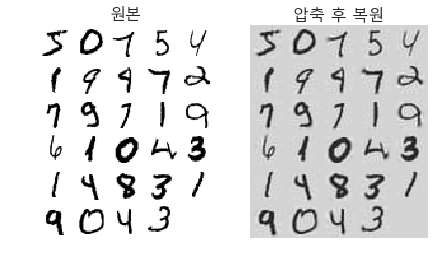

In [135]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)
plot_digits(X_recovered[::2100])

### 8.3.9 Incremental PCA (IPCA)

PCA의 단점은 SVD(scikit-learn에서)를 수행하기 위해서는 전체 학습 데이터셋을 메모리에 올려야 한다는 것이다. 이러한 단점을 보완하기 위해 **Incremental PCA(IPCA)** 알고리즘이 개발되었다. 

IPCA는 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나의 미니배치를 입력으로 넣어준다. IPCA는 학습 데이터셋이 클때 유용하다.

Scikit-Learn에서는 [`IncrementalPCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA)를 통해 Incremental PCA를 사용할 수 있다. 아래의 예제는 MNIST 데이터를 100개의 미니배치로 나눠 PCA를 수행하는 코드이다.

In [136]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(batch_x)

X_reduced = inc_pca.transform(train_x)

....................................................................................................

In [137]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

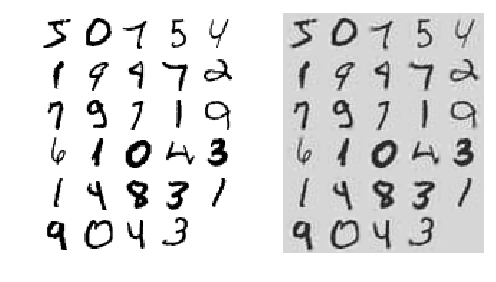

In [138]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

### 8.3.9 랜덤 PCA

Scikit-Learn의 `PCA`에서는 **Randomized PCA**를 제공한다. 이 방법은 첫 $d$개의 주성분에 대해 근사값을 빠르게 찾는다.

In [139]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(train_x)

In [140]:
X_reduced.shape

(60000, 154)

## 8.4 Kernel PCA

['서포트벡터머신, SVM'](http://excelsior-cjh.tistory.com/165)에서 커널을 이용해 데이터를 저차원에서 고차원으로 매핑시켜 비선형 데이터셋에 SVM을 적용시키는 Kernel SVM에 대해 알아보았다. 

이렇게 같은 기법을 PCA에 적용해 비선형 투영으로 차원을 축소할 수 있는데, 이것을 **Kernel PCA**(KPCA)라고 한다. Scikit-Learn의 [`KernelPCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)를 통해 Kernel PCA를 적용할 수 있다. 

In [142]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [143]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

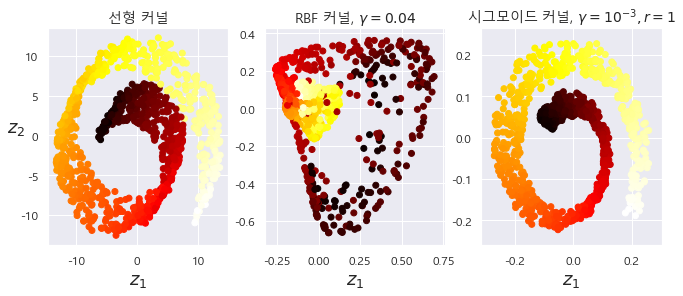

In [144]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()